<a href="https://colab.research.google.com/github/srijanparia/ImageClassification_using_MObileNetV2/blob/main/ImageClassification_using_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import tensorflow_hub as hub

import PIL.Image as Image
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
np.array(Image.open("/content/goldfish.jpeg")).shape

(720, 1280, 3)

In [5]:
gold_fish = Image.open("/content/goldfish.jpeg").resize(IMAGE_SHAPE)

In [6]:
np.array(gold_fish).shape

(224, 224, 3)

In [7]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...]

array([[[[0.30588235, 0.56078431, 0.78039216],
         [0.30980392, 0.56470588, 0.78431373],
         [0.30980392, 0.56470588, 0.78431373],
         ...,
         [0.3372549 , 0.58431373, 0.79607843],
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686]],

        [[0.30196078, 0.55686275, 0.77647059],
         [0.30588235, 0.56078431, 0.78039216],
         [0.30980392, 0.56470588, 0.78431373],
         ...,
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686]],

        [[0.30980392, 0.56470588, 0.78431373],
         [0.30588235, 0.56078431, 0.78039216],
         [0.30588235, 0.56078431, 0.78039216],
         ...,
         [0.32941176, 0.57647059, 0.78823529],
         [0.32941176, 0.57647059, 0.78823529],
         [0.3372549 , 0.58431373, 0.79607843]],

        ...,

        [[0.27058824, 0.54117647, 0.77647059],
         [0.27058824, 0.5372549 , 0.77647059]

In [9]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [10]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [13]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/4258408909_b7cc92741c_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/495098110_3a4bb30042_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4144275653_7c02d47d9b.jpg'),
 PosixPath('datasets/flower_photos/daisy/6884975451_c74f445d69_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/11023272144_fce94401f2_m.jpg')]

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/512578026_f6e6f2ad26.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16258946661_f9739cdc0a.jpg')]

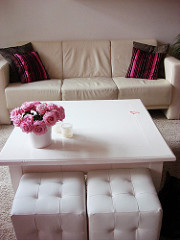

In [16]:
Image.open(str(roses[0]))

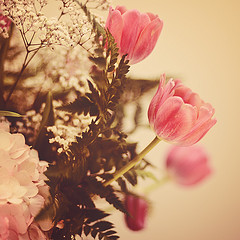

In [17]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [18]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [24]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [25]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs = 5)

In [ ]:
model.evaluate(X_test_scaled,y_test)